In [1]:
import sys, os
modules_path = os.path.abspath('../modules')
if modules_path not in sys.path:
    sys.path.append(modules_path)

import numpy as np
from array import array
import matplotlib.pyplot as plt
from time import time

from binding import ConcentrationSweep, Equilibrium
from partitions import PartitionFunction, Microstates

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# parameters (energies in kcal/mole, ordered Pnt-Yan)
a0, b0, c0 = -9.955, -5.837, -7.043

#alpha = [.96*(a0+c0), a0] 
alpha = [1.3*a0, 1.3*a0]
beta = [.8*(b0+c0), b0] 
gamma = [0, .7*c0] 

params = dict(alpha=alpha, beta=beta, gamma=gamma)
print(alpha[0])
print(beta[0])

-12.941500000000001
-10.304


In [8]:
%%prun -D ../profiling/runtime.prof
start = time()
microstates = Microstates(Ns=5, params=params, ets=(0, ))
sweep = ConcentrationSweep(cmin=0, cmax=1000, density=25)
sweep.set_occupancies(microstates, method='c')
print(time()-start)

0.0070879459381103516
 
*** Profile stats marshalled to file '../profiling/runtime2.prof'. 


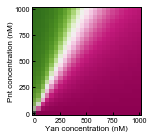

In [4]:
fig = sweep.plot_overall_occupancy(species='Pnt', mask=True, figsize=(2, 2), cmap=plt.cm.PiYG)

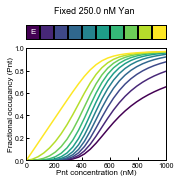

In [5]:
fig = sweep.plot_contours(species='Pnt', variable='Pnt', fixed=6, figsize=(2.5, 2.5))

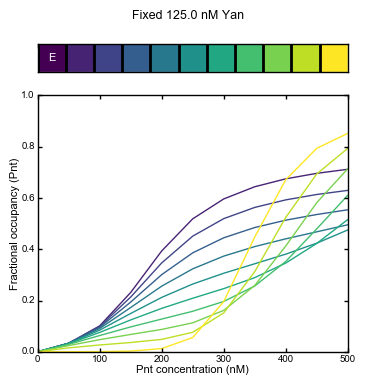

In [166]:
Ns=11
fixed = 2
cmax = 500

# create figure
microstates = Microstates(Ns=Ns, params=params, ets=(0, ))
sweep = ConcentrationSweep(cmin=0, cmax=cmax, density=9)
sweep.set_occupancies(microstates, method='c')
fig, cmap, norm = sweep.create_figure(fixed=fixed)
ax = fig.axes[1]

# add contours
for ets_site in range(1, Ns):
    microstates = Microstates(Ns=Ns, params=params, ets=(0, ets_site))
    sweep = ConcentrationSweep(cmin=0, cmax=cmax, density=11)
    sweep.set_occupancies(microstates, method='c')
    ax = sweep.add_contour(ax, fixed=fixed, color=cmap(norm(ets_site)))

In [59]:
norm(10)

1.0

yayya


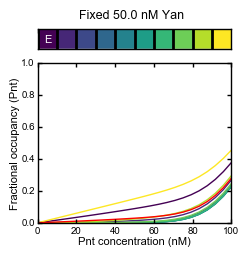

In [8]:
fig = sweep.plot_overall_contours(species='Pnt', variable='Pnt', fixed=12, figsize=(2.5, 2.5))

In [ ]:
color = cmap(norm(proximity[i]))

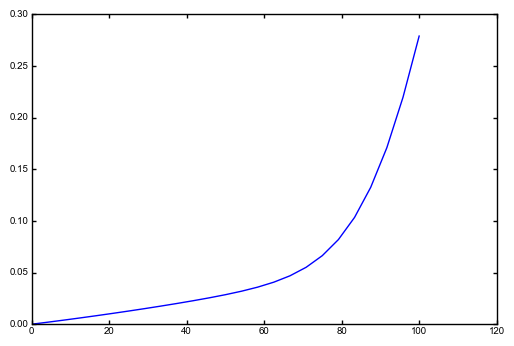

In [419]:
fig, ax = plt.subplots()


data = (sweep.occupancies[:, :, sweep.names['Pnt']].mean(axis=0).reshape(*(sweep.density,)*2))[:, fixed]
ax.plot(sweep.C*1e9, data)


In [415]:
data

array([ 0.        ,  0.00196749,  0.0039938 ,  0.00608138,  0.00823283,
        0.01045096,  0.01273905,  0.01510144,  0.01754489,  0.02008133,
        0.02273276,  0.02553958,  0.02857366,  0.03195803,  0.03589484,
        0.04070316,  0.04686673,  0.05508902,  0.06634696,  0.0819245 ,
        0.10339325,  0.13249321,  0.17086624,  0.21962918,  0.27886079])

In [84]:
cms = microstates.get_c_microstates()
a,b,g = cms.get_energy_contributions()
pf = PartitionFunction(microstates, sweep.C)
probabilities = pf.preallocate_probabilities()
R = 1.987204118*1E-3
T = 300
gc = np.vstack((a,b,g))
#ec = np.exp(-gc/(R*T))
ec = -gc
contrib = np.dot(probabilities, ec.T)
contrib = contrib / contrib.sum(axis=1).reshape(-1, 1)
contrib = contrib.reshape((sweep.density, sweep.density, 6))
binding = contrib[:,:,:4].sum(axis=-1)
polymerization = 1 - binding

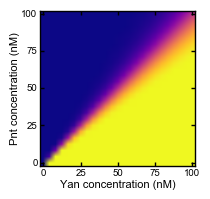

In [86]:
# plot contributions

# create figure

figsize = (2, 2)
name = 'Polymerization'
from matplotlib import gridspec
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots(figsize=figsize)

# visualize occupancy
cmap = plt.cm.plasma
ax.imshow(polymerization, cmap=cmap, vmin=0, vmax=.5)
ax.invert_yaxis()
ax.set_xlabel('Yan concentration (nM)')
ax.set_ylabel('Pnt concentration (nM)')
ax.set_aspect(1)
sweep.format_ticks(ax)
#fig.savefig('unequal_contributions.pdf', dpi=400, format='pdf')

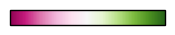

In [121]:
# plot colorbar
cmap = plt.cm.PiYG
fig, ax_cbar = plt.subplots(figsize=(2, .2))
norm = Normalize(0, 0.5)
cbar = ColorbarBase(ax_cbar, cmap=cmap, norm=norm, orientation='horizontal')
cbar.set_ticks([])
#fig.savefig('piyg_colorbar.pdf', dpi=400, format='pdf')
#ax_cbar.xaxis.set_ticks_position('top')
#ax_cbar.tick_params(labelsize=8, pad=0)
#label = 'Relative Contribution'
# if name is not None:
#     label = label + ' ({:s})'.format(name)
#cbar.set_label(label, fontsize=8)
#cbar.set_ticks([0, .5])
#cbar.set_ticklabels(['Free binding', 'Polymerization'])
#ax_cbar.tick_params(pad=3)

In [128]:
7/8

0.875

In [100]:
# parameters (energies in kcal/mole, ordered Pnt-Yan)
a0, b0, c0 = -9.955, -5.837, -7.043
alpha = [a0, a0] 
beta = [b0, b0] 
gamma = [c0, c0] 
params = dict(alpha=alpha, beta=beta, gamma=gamma)

In [107]:
#%%prun -D runtime.prof
start = time()
microstates = Microstates(Ns=12, params=params, ets=(0, ))
sweep = ConcentrationSweep(cmin=0, cmax=2, density=25)
sweep.set_occupancies(microstates, method='c')
print(time()-start)

19.647157192230225


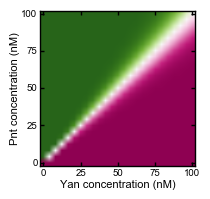

In [89]:
fig = sweep.plot_overall_occupancy(species='Pnt', figsize=(2, 2), cmap=plt.cm.PiYG)
#fig.savefig('equal_poly.pdf', dpi=400, format='pdf')

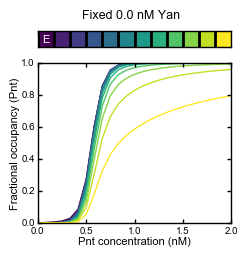

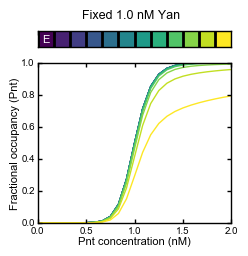

In [112]:
fig0 = sweep.plot_contours(species='Pnt', variable='Pnt', fixed=0, figsize=(2.5, 2.5))
fig1 = sweep.plot_contours(species='Pnt', variable='Pnt', fixed=12, figsize=(2.5, 2.5))
#fig0.savefig('no_competition.pdf', dpi=400, format='pdf')
#fig1.savefig('with_competition.pdf', dpi=400, format='pdf')

In [95]:
cms = microstates.get_c_microstates()
a,b,g = cms.get_energy_contributions()
pf = PartitionFunction(microstates, sweep.C)
probabilities = pf.preallocate_probabilities()
R = 1.987204118*1E-3
T = 300
gc = np.vstack((a,b,g))
#ec = np.exp(-gc/(R*T))
ec = -gc
contrib = np.dot(probabilities, ec.T)
contrib = contrib / contrib.sum(axis=1).reshape(-1, 1)
contrib = contrib.reshape((sweep.density, sweep.density, 6))
binding = contrib[:,:,:4].sum(axis=-1)
polymerization = 1 - binding

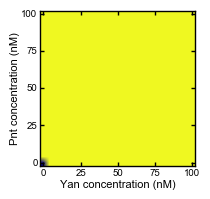

In [99]:
# plot contributions

# create figure
figsize = (2, 2)
name = 'Polymerization'
from matplotlib import gridspec
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots(figsize=figsize)

# visualize occupancy
cmap = plt.cm.plasma
ax.imshow(polymerization, cmap=cmap, vmin=0, vmax=.5)
ax.invert_yaxis()
ax.set_xlabel('Yan concentration (nM)')
ax.set_ylabel('Pnt concentration (nM)')
ax.set_aspect(1)
sweep.format_ticks(ax)

# # add colorbar
# ax_cbar = plt.subplot(gs[1])
# norm = Normalize(0, 0.5)
# cbar = ColorbarBase(ax_cbar, cmap=cmap, norm=norm, orientation='horizontal')
# ax_cbar.xaxis.set_ticks_position('top')
# ax_cbar.tick_params(labelsize=8, pad=0)
# label = 'Relative Contribution'
# # if name is not None:
# #     label = label + ' ({:s})'.format(name)
# cbar.set_label(label, fontsize=8)
# cbar.set_ticks([0, .5])
# cbar.set_ticklabels(['Free binding', 'Polymerization'])
# ax_cbar.tick_params(pad=3)

#fig.savefig('equal_poly_contributions.pdf', dpi=400, format='pdf')

In [131]:
# parameters (energies in kcal/mole, ordered Pnt-Yan)
a0, b0, c0 = -9.955, -5.837, -7.043
alpha = [a0+c0, a0+c0] 
beta = [b0+c0, b0+c0] 
gamma = [0, 0] 
params = dict(alpha=alpha, beta=beta, gamma=gamma)
R, T = 1.987204118*1E-3, 300  # Kcal/mol/K

In [132]:
#%%prun -D runtime.prof
start = time()
microstates = Microstates(Ns=12, params=params, ets=(0, ))
sweep = ConcentrationSweep(cmin=0, cmax=100, density=25)
sweep.set_occupancies(microstates, method='c')
print(time()-start)

19.835399866104126


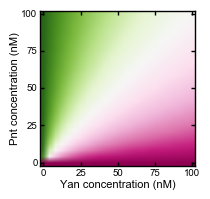

In [133]:
fig = sweep.plot_overall_occupancy(species='Pnt', figsize=(2, 2), cmap=plt.cm.PiYG)
#fig.savefig('equal.pdf', dpi=400, format='pdf')

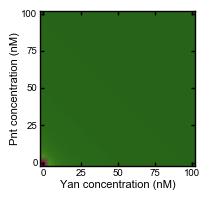

In [135]:
fig = sweep.plot_overall_occupancy(species='total', figsize=(2, 2), cmap=plt.cm.PiYG)

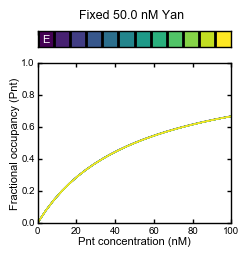

In [49]:
fig = sweep.plot_contours(species='Pnt', variable='Pnt', fixed=12, figsize=(2.5, 2.5))
#fig.savefig('equal_contours.pdf', dpi=400, format='pdf')

In [123]:
from partitions import get_ternary_repr

In [127]:
n = 2

for k in range(3**n):
    print(k, list(get_ternary_repr(k)[1]))

0 [0]
1 [1]
2 [2]
3 [0, 1]
4 [1, 1]
5 [2, 1]
6 [0, 2]
7 [1, 2]
8 [2, 2]


In [ ]:
# qiao 2005 - TEL inter-sam domain Kd=2 nM , yan inter-sam domain Kd= 11 uM

Mae inhibits Pointed‐P2 transcriptional activity by blocking its MAPK docking site

In [4]:
R = 1.987204118*1E-3 
T = 300

In [5]:
Kd = 11 * 1e-6
dG = R*T*np.log(Kd)
dG

-6.806739633726429

2.8000000000000003e-08

In [148]:
 R*T*np.log(.85 * 1e-9)

-12.451295248661868

In [6]:
get_free_energy = lambda Kd: R*T*np.log(Kd)

In [7]:
Kd = 11 * 1e-6

get_free_energy(Kd)

-6.806739633726429

In [17]:
# affinity of 27 bp oligonucleotude for ETS1,  Kd = 2.5 +- 0.5  * 1e-11 M
dG_specific = get_free_energy(2.5*1e-11)

# affinity of ETS1 for 9 bp randomly-chosen non-specific oligonucleotide, Kd ~ 10 uM
dG_non_specific9 = get_free_energy(1e-5)

# affinity of ETS1 for 15 bp randomly-chosen non-specific oligonucleotide, Kd < 10 uM
dG_non_specific15 = get_free_energy(1e-6)

In [18]:
print('Specific', dG_specific)
print('Non-specific, 9b', dG_non_specific9)
print('Non-specific, 15b', dG_non_specific15)

Specific -14.5535746955
Non-specific, 9b -6.86355986826
Non-specific, 15b -8.23627184192


In [109]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x, y)

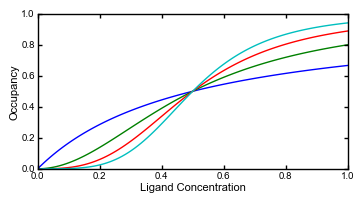

In [79]:
fig, ax = plt.subplots(figsize=(4, 2))

for n in range(1, 5):
    ax.plot(x, hill(x, n), '-')

ax.set_xlabel('Ligand Concentration')
ax.set_ylabel('Occupancy')

In [122]:
from matplotlib.colors import Normalize

In [155]:
def plot_coverage(xc, tc, ax, cmap=plt.cm.Greens):
    
    # apply transparency
    norm = Normalize(0, 1)
    colors = cmap(norm(xc))
    colors[:, :, -1] = tc**2
        
    bg = np.empty(xc.shape + (3,), dtype=np.uint8)
    bg.fill(70)
    ax.imshow(bg)
    
    # show
    ax.imshow(colors)
    ax.invert_yaxis()
    ax.set_xlabel('Pnt Concentration')
    ax.set_ylabel('Yan Concentration')

def hill(x, n=1, km=10):
    return (x**n) / ((x**n) + (km**n))
    
def competitive(x, y, n=(1, 1), km=(0.1, 0.1)):
    x_coverage = (km[0]*x)**n[0] / (  1 + ((km[0]*x)**n[0]) + ((km[1]*y)**n[1]) )
    total_coverage = 1 - (1 / (  1 + ((km[0]*x)**n[0]) + ((km[1]*y)**n[1]) ))
    return x_coverage, total_coverage

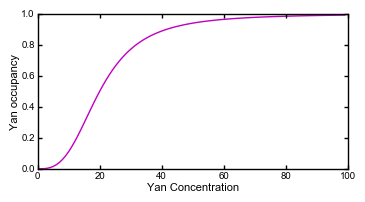

In [339]:
x, y = np.arange(100), np.arange(100)
xx, yy = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(4, 2))
for n in range(3, 4):
    ax.plot(xx[0], hill(xx[0], n, km=20), 'm')
    #ax.plot(xx[0], competitive(xx, yy, (n, n))[0][0], '--r')

ax.set_ylim(0, 1)
    
ax.set_xlabel('Yan Concentration')
ax.set_ylabel('Yan occupancy')

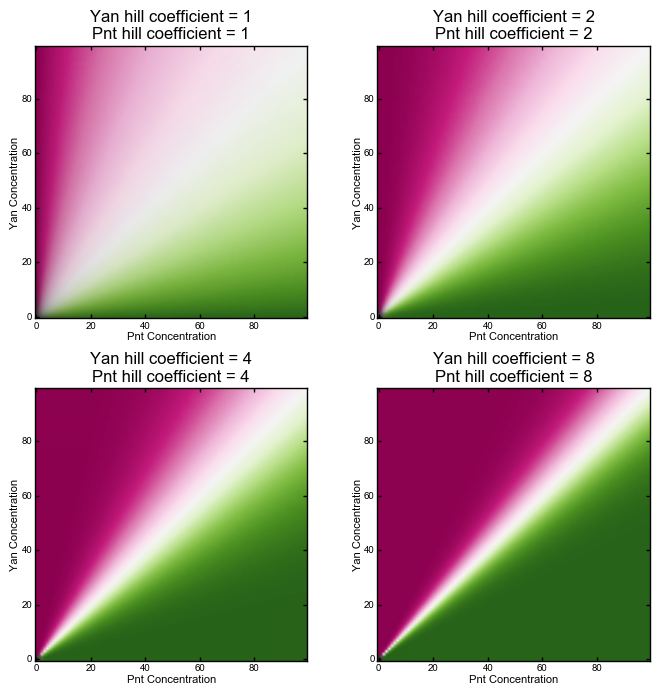

In [359]:
x, y = np.arange(100), np.arange(100)
xx, yy = np.meshgrid(x, y)

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(7, 7))

for i, ax in enumerate(axes.flatten()):
    n = 2**i
    xc, tc = competitive(xx, yy, n=(n, n), km=(1, 1))
    plot_coverage(xc, tc, ax, cmap=plt.cm.PiYG, )
    ax.set_title('Yan hill coefficient = {:d}\nPnt hill coefficient = {:d}'.format(n, n))
plt.tight_layout()

<bound method _AxesBase.set_xticklabels of <matplotlib.axes._subplots.AxesSubplot object at 0x126f1eac8>>

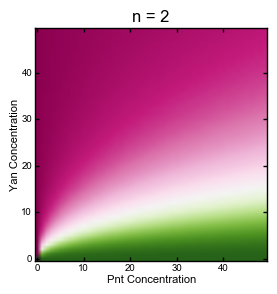

In [327]:
scale = 10
x, y = np.linspace(0, 100*scale, 50), np.linspace(0, 100*scale, 50)
xx, yy = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(12, 3))

n = 2
xc, tc = competitive(xx, yy, n=(1, n), km=(1*10**n, 1))
plot_coverage(xc, tc, ax, cmap=plt.cm.PiYG, )
ax.set_title('n = {:d}'.format(n))

ax.set_xticklabels

In [40]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x, y)

0.0

In [41]:
zz.max()

0.33333333333333331